In [60]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import statsmodels as sts
import warnings
warnings.filterwarnings('ignore')

In [61]:
df=pd.read_csv("Fraud.csv")

In [62]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [63]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [65]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [66]:
df.duplicated().sum()

0

In [67]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# outliers

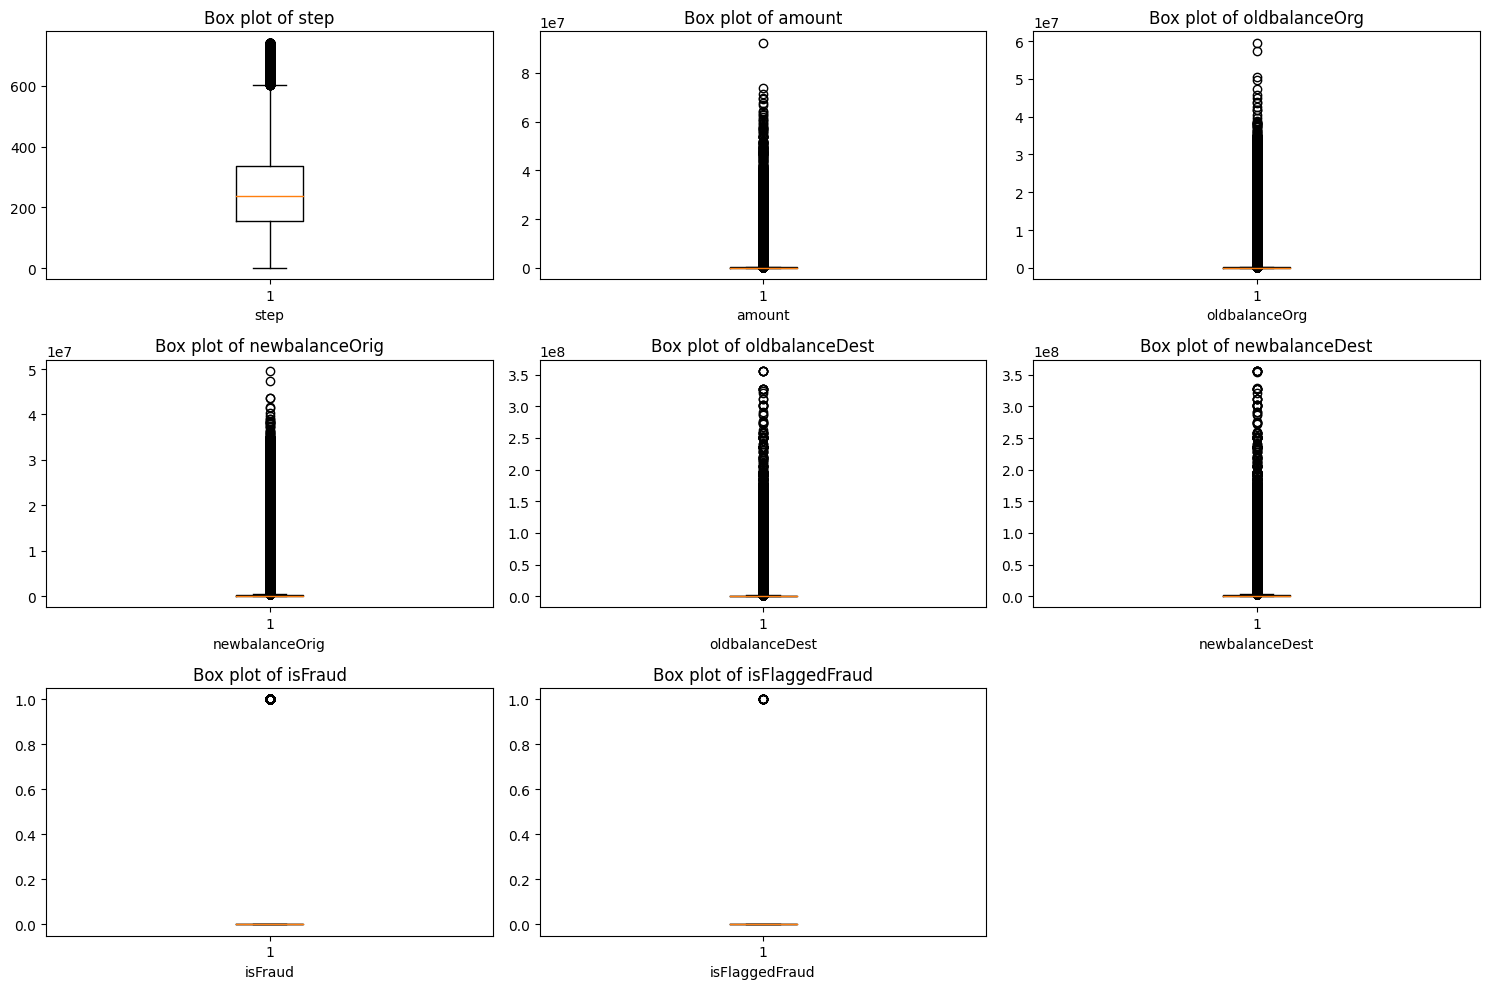

In [68]:
import matplotlib.pyplot as plt

# Selecting only numerical columns for visualization
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Creating box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [69]:
# Detect and remove outliers using Z-score method
from scipy.stats import zscore

# Compute Z-scores for numerical columns
z_scores = df[numerical_cols].apply(zscore)

# Define a threshold for Z-scores (e.g., 3 standard deviations)
threshold = 3

# Remove rows where any Z-score exceeds the threshold
df_no_outliers = df[(z_scores.abs() < threshold).all(axis=1)]


In [70]:
# Check if the cleaned DataFrame is not empty
if not df_no_outliers.empty:
    # Compute Z-scores for numerical columns in the cleaned DataFrame
    z_scores_cleaned = df_no_outliers[numerical_cols].apply(zscore)

    # Count the number of outliers in each numerical column
    outliers_count_cleaned = (z_scores_cleaned.abs() > threshold).sum()

    print("Number of outliers in each numerical column after outlier removal:")
    print(outliers_count_cleaned)
else:
    print("The cleaned DataFrame is empty.")


Number of outliers in each numerical column after outlier removal:
step               13755
amount            123703
oldbalanceOrg     221237
newbalanceOrig    222665
oldbalanceDest    174463
newbalanceDest    172165
isFraud                0
isFlaggedFraud         0
dtype: int64


In [71]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# correlation matrix

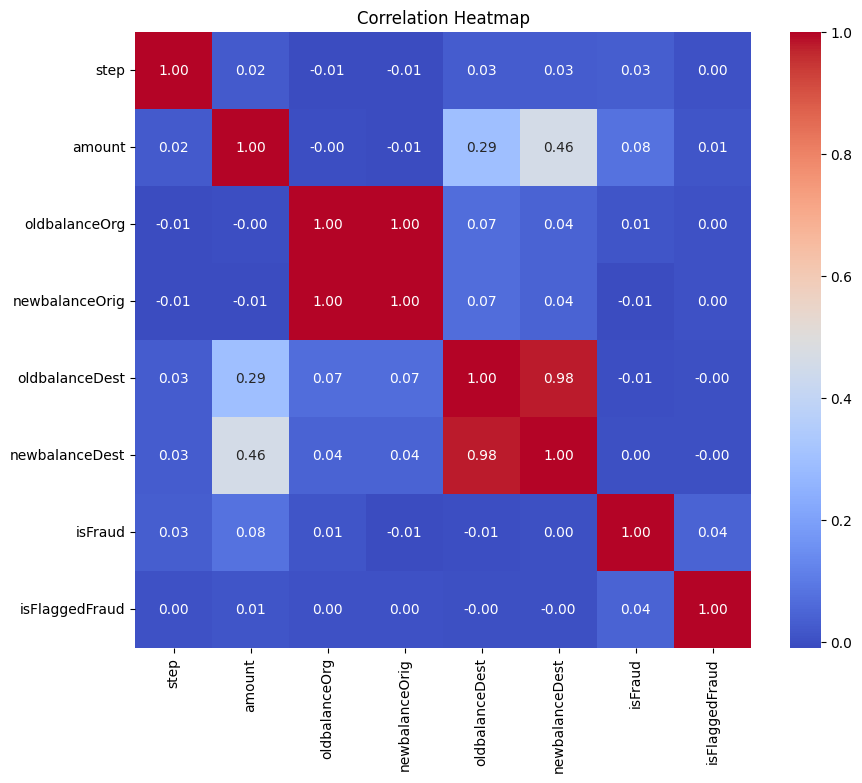

In [72]:
import seaborn as sns

# Compute the correlation matrix for numerical columns
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


In [73]:
# Selecting only numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix for numerical columns
correlation_matrix = df[numerical_cols].corr().abs()

# Identify highly correlated features
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]

# Drop highly correlated features from the DataFrame
df_no_corr = df.drop(to_drop, axis=1)
df_no_corr

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,M1979787155,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,M2044282225,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,C553264065,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,C38997010,21182.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,M1230701703,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,C776919290,0.00,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,C1881841831,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,C1365125890,68488.84,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,C2080388513,0.00,1,0


# Model Building

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Selecting features and target variable
X = df.drop(columns=['isFraud','type','nameDest','nameOrig'])
y = df['isFraud']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Performance:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Model Performance:
Accuracy: 0.9992110168452618
Confusion Matrix:
 [[1270838      66]
 [    938     682]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.91      0.42      0.58      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.71      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Selecting features and target variable
X = df.drop(columns=['isFraud','type','nameDest','nameOrig'])
y = df['isFraud']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Making predictions on both training and testing data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Model evaluation for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

# Model evaluation for testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("Training Data Performance:")
print("Accuracy:", train_accuracy)
print("Confusion Matrix:\n", train_conf_matrix)
print("Classification Report:\n", train_class_report)

print("\nTesting Data Performance:")
print("Accuracy:", test_accuracy)
print("Confusion Matrix:\n", test_conf_matrix)
print("Classification Report:\n", test_class_report)


Training Data Performance:
Accuracy: 0.9992184823233197
Confusion Matrix:
 [[5083260     243]
 [   3735    2858]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083503
           1       0.92      0.43      0.59      6593

    accuracy                           1.00   5090096
   macro avg       0.96      0.72      0.79   5090096
weighted avg       1.00      1.00      1.00   5090096


Testing Data Performance:
Accuracy: 0.9992110168452618
Confusion Matrix:
 [[1270838      66]
 [    938     682]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.91      0.42      0.58      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.71      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



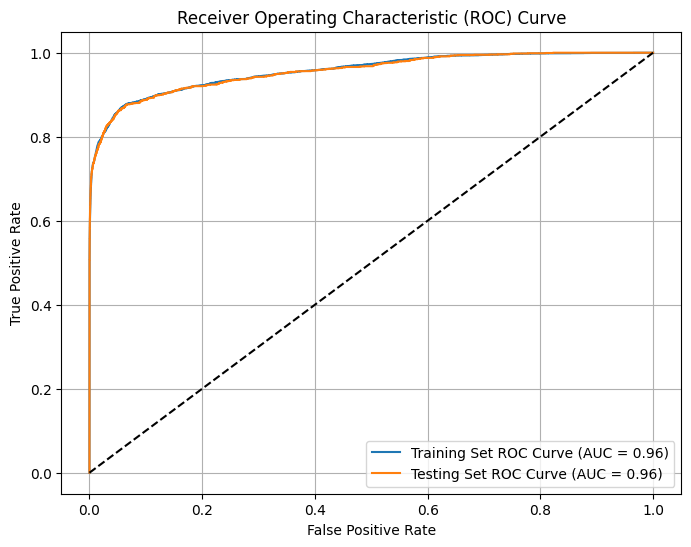

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities for positive class (fraud)
y_train_prob = model.predict_proba(X_train_scaled)[:, 1]
y_test_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Calculate AUC score
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training Set ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Testing Set ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


# Candidate Expectations